# Greetings traveller! 
Welcome to Week 1 of the AIAP coursework. In the next 6 weeks, you will be *travelling* through the machine learning *space*, where we will be looking at various different machine learning problems and how to solve them. We will be taking a quick sweep through the many areas of analytics and machine learning, including learning about learning from data itself.

## Course Objectives

This course is designed to be different from the courses you have done previously. We acknowledge that there are lots of great free resources online, and are not trying to create yet another tutorial. Rather, we attempt to provide something that complements them, mirroring real-life problem solving. In general, we have the following goals out of the programme:
- __Finger-dipping exposure into ML__: we concede that six weeks are insufficient to fully understand ML, and we do not aim to do that. Rather, we would like to provide sufficient breadth in terms of practical, useful knowledge in the area.
- __Confidence to go further yourself__: the ML space is vast and expanding every day, no practitioner is ever sufficently trained to tackle any problem. Rather, good data scientists hone a sharp ability to learn new techniques to solve novel problems. We wish to build your confidence to go into the unknown, so that you can rely on yourself for learning beyond textbook knowledge.
- __Programming competency__: while we are not training software engineers, writing good, clean code is crucial to the success of any project that requires programming. We will provide guidance on how to write reproducible, human-centric code for data science that will pay dividends for a project in the long term.
- __Employability__: ultimately, we aim to help you get hired in the data science space, and we have crafted our notebooks to act like mock technical assessments in a safe space. The six week programme will equip you with critical soft skills for data science as well.

## Prerequisite Knowledge

This is certainly not a course for beginners. Considering that this will be a full-time, six-week programme, we have designed the course to be challenging in every aspect. Realistically, we would not expect anyone to be comfortable handling the course. Although the programme will be challenging, we wish to cultivate a forgiving, learning-based culture where necessary failure is celebrate encouraged and celebrated. Nevertheless, the following prerequisites will help you do well in this course:
- __Python, or general programming skills__: an ability to execute basic tasks beyond hello world in Python, or simply being comfortable with computer languages in general
- __Numerical programming__: an ability to execute mathematical scripts through a programming language like Python (it will be relatively easy to transition from Matlab, R, SAS or Julia)
- __Statistical fundamentals__: you should know how basic tools like linear and logistic regression work, and have a mathematical appreciation for it
- __Linear algebra and calculus__: basic mathematical knowledge will help you appreciate the algorithms and learn to use them better
- __A positive learning attitude__ most importantly, because realistically, no one will have all of the above, so we will all need to adapt and learn.

## Learning Resources 

At one or more points in time while attempting this notebook, you may find the following resources to be useful:
- Intro to Python Programming: [Python at PluralSight](https://app.pluralsight.com/paths/skills/python)*
- Numerical computing in Python: [Python for Data Science, 2nd Ed. by Wes McKinney](http://wesmckinney.com/pages/book.html)
- Random Forests in depth and from scratch: [fast.ai Machine Learning Course](https://course.fast.ai/ml)
- Organising your notebook: [initial steps toward reproducible research by Karl Broman](https://kbroman.org/steps2rr/)
- Finding specific methods in Pandas: [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- All the answer keys you'll ever need: [Kaggle's Titanic Kernel](https://www.kaggle.com/c/titanic/kernels)

*You'll get free access to Pluralsight's Python track through your DataCamp subscription!

These are just recommended resources - do tap on anything you find useful, or approach us for alternative recommendations.

## Collaboration Policy

Collaboration is the best way to learn. In short, we should optimise learning - the general rule is to try everything yourself first, then discuss your method with your teammates. Do not directly copy their code, unless you are trying to learn a programming technique. Be smart and flexible - do your own thinking and write your own code.

If you believe referring to someone's answer is the best way to learn, we recommend looking at the code, then walking away for a few minutes, and come back to write your own version of the code. There will be minimum policing, but we expect no plagurism or direct copying of code to occur.

Please list your collaborators:

In [ ]:
1. John Smith
2. ???

## Time Management

In this notebook, there will two main areas of focus: modelling, and model implementation (numerical programming). Different people will have different strengths, and our advice is to play to your strengths, and collaborate to learn from people who can teach you something, but offer something in return. Unless you are really good with everything the notebook needs you to do, __you are not likely to finish the notebook by doing it alone__.

For those who are very new to programming, it's okay to realise that you might not finish the notebook this week. If you are feel that you might not be ready to mix different technical fields together, considering spending more time building up your fundamentals instead - take your time if you need to. If you need more assistance, don't hesitate to speak to us!

Now, let's get into week one of the course! __Good luck, have fun.__

# 1. Initial Modelling 

Our problem this week is the el classico: the Titanic dataset, a dataset probably done to death by fellow travellers of the machine learning space. There is a reason why this dataset is so popular - it demands for all the fundamentals required of statistical modelling, while staying light in terms of technical demands. With just 891 rows of data, the problem can be solved on any laptop. While your laptop would not face much stress this week, we would recommend you to consider your technical set-up, so that as heavier datasets come about (in the size of GBs), you will not be limited by them.

First, go grab the data. The data is available at https://www.kaggle.com/c/titanic/data, you will need to register an account to retrieve it.

Since we are talking about downloading data, we should take this time to set up your folder. One such way (our recommended way) to do it as to create a project folder, then leave your notebooks in the root of that folder. Your code base, which we will be starting to build over time, should be in a `src` subfolder, while your data should be in a `data` folder, with a tree structure as shown:

```
aiap
 |- src
 |- data
 |   |- titanic.csv
 |   |- titanic_test.csv
 |- week1.ipynb
```

This is an opinionated format - we suggest this only for simplicity reasons.

Now, we are ready to do some coding work. First, import the necessary libraries you need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Import your data.

In [18]:
dataset_raw = pd.read_csv('data/titanic.csv')

## Initial Model 

Train a stock random forest model (with no custom parameters and report the accuracy score). Do the __minimal__ cleaning required to let your model fit into the model. Using the `train_test_split` method, reserve some validation data for evaluation use.

You may see an accuracy of approximately 75% - this does not mean anything substantially, but it lets us know that a no-value-add approach to modelling will already generate this accuracy for us. Hence, our goal is to improve upon this current score, and reach as high as possible. For now, 75% is good enough for us to proceed.

In [19]:
# Clean Data by filling NaNs with dummy values
dataset_nonans = dataset_raw.copy()
dataset_nonans['Age'].fillna(999, inplace=True)
dataset_nonans['Cabin'].fillna('NA', inplace=True)
dataset_nonans['Embarked'].fillna('NA', inplace=True)
X = dataset_nonans.drop(['PassengerId', 'Survived'], axis=1)
y = dataset_nonans['Survived']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder_name = LabelEncoder()
X['Name'] = label_encoder_name.fit_transform(X['Name'])
labelencoder_sex = LabelEncoder()
X['Sex'] = labelencoder_sex.fit_transform(X['Sex'])
labelencoder_ticket = LabelEncoder()
X['Ticket'] = labelencoder_ticket.fit_transform(X['Ticket'])
labelencoder_cabin = LabelEncoder()
X['Cabin'] = labelencoder_cabin.fit_transform(X['Cabin'])
labelencoder_embark = LabelEncoder()
X['Embarked'] = labelencoder_embark.fit_transform(X['Embarked'])
X_dummies = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

# Split data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2018,
                                                    stratify=y)

# Fit random forest without paramter tuning
from sklearn.ensemble import RandomForestClassifier
rf_initial = RandomForestClassifier()
rf_initial.fit(X_train, y_train)

# Determine accuracy using test set
from sklearn.metrics import accuracy_score
accuracy_initial = accuracy_score(y_test, rf_initial.predict(X_test))
print('Accuracy of initial model: {:.1f}%'.format(accuracy_initial * 100))

Accuracy of initial model: 82.1%


# 2. Exploring the data 

## Overall Dataset 

Conduct some initial exploration of this data. This could be through dataset level plots, correlation charts and table describes, as well as by understanding what kind of information is available, or not available (i.e. missing). Write a paragraph on what you observe in the data. There is no correct answer, but do present useful and insightful information as much as possible.

This part of the notebook should be helpful to someone who is trying to come into your project, but has no knowledge of the data. In complex, real-world problems, there may be multiple data sources, each with different structures of data. Making sense of data at this macro level may happen over several months in an iterative manner.

In [20]:
# Create new copy of dataset
dataset_v2 = dataset_raw.copy()
dataset_v2 = dataset_v2.drop(['PassengerId'], axis=1)

# Checking for missing data
dataset_v2.info()

# Correlation matrix and plot
print(dataset_v2.drop('Survived', axis=1).corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 59.2+ KB
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000


Observations:
1. There is missing data in the 'Age', 'Cabin' and 'Embarked' Columns. Specifically there are 177 NaNs in 'Age', 687 NaNs in 'Cabin' and 2 NaNs in 'Embarked'.
2. The variables 'Age', 'SibSp', 'Parch' and 'Fare' are numerical, while the variables 'Pclass', 'Sex', 'Cabin' and 'Embarked' are categorical.
3. This is moderate correlation between (Pclass, Age), (Pclass, Fare), (SibSp, Age), (SibSp, Parch) pairs. The values of correlation for these variable pairs are between 0.3 and 0.6. These values can be either positive or negative.

'PassengerId' was removed as it does not make sense to include such information in the dataset.

## Individual Variables 

We now go deeper into individual variables. For each variable, provide plots, tables or descriptions that best capture the nuance of that column. There is no correct answer, but there is a gold standard.

Samples of this can be found in Kaggle's kernels page. While we value pretty charts, we value insights much more. Where insightful information is found, please indicate them in your notebook for your reader.

You may wish to strategically go deeper into variables you find more interesting. There is no need to scrutinize every variable.

### PassengerId

As mentioned before, it does not make sense to include 'PassengerId', so it will not be included in the subsequent processes.

### Survived

This is the target variable for this problem, i.e. the variable to be predicted. It is categorical, and takes the values of 0 and 1.

0 - non-survival, 1 - survival

In [21]:
# Show percentages of Survived
print('Percentages:')
print(dataset_v2['Survived'].value_counts(normalize=True)*100)

Percentages:
0    61.616162
1    38.383838
Name: Survived, dtype: float64


Based on the counts of observations in each class, it appears that there is some imbalance of classes in the target variable, i.e. the non-survival class having more observations than the other class. Thus a model trained on this dataset might be somewhat biased to the non-survival class.

### Pclass

This is one of the predictors for this problems. It is categorical, and takes on the values of 1, 2 and 3.

1 - 1st class, 2 - 2nd class, 3 - 3rd class.

There is no need for one-hot encoding of this variable, as it is ordinal.

In [23]:
# Show percentages of Pclass
print('Percentages:')
print(dataset_v2['Pclass'].value_counts(normalize=True)*100)

Percentages:
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


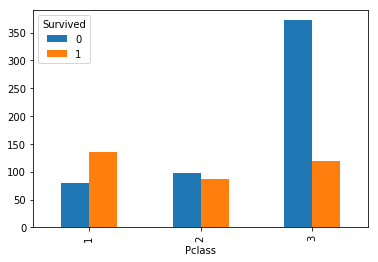

In [64]:
# Crosstab plot of Pclass
pclass_crosstab = pd.crosstab(index=dataset_v2['Pclass'],
                                columns=dataset_v2['Survived'])
pclass_crosstab.plot(kind='bar',
                       stacked=False)

It can be seen that slightly more than half of the passengers hold 3rd class tickets, while there are slightly more 1st class ticket holders than 2nd class ticket holders. From the crosstab plot, it can be deduced that 3rd class ticket holders had the lowest chance of surviving, while 2nd class ticket holders had relatively higher chance of survival, and 1st class ticket holders had the highest chance of surviving.

### Name

The name would not be used directly in the model building process, but the salutation (Mr., Mrs. etc) contained in each value could be used to help fill in missing values in the 'Age' column.

### Sex

This is one of the predictors for this problems. It is categorical, and takes on the values of 0 and 1.

0 - female, 1 - male.

There is no need for one-hot encoding of this variable as it is in essence a dummy variable.

In [24]:
# Show percentages of Sex
print('Percentages:')
print(dataset_v2['Sex'].value_counts(normalize=True)*100)

Percentages:
male      64.758698
female    35.241302
Name: Sex, dtype: float64


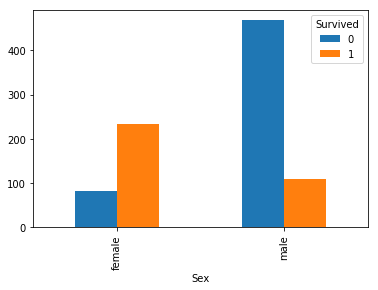

In [65]:
# Crosstab plot of Sex
sex_crosstab = pd.crosstab(index=dataset_v2['Sex'],
                           columns=dataset_v2['Survived'])
sex_crosstab.plot(kind='bar',
                       stacked=False)

It can be seen that there are somewhat more male passengers compared to female passengers (65% vs 35%). From the crosstab, it can be observed that females were more likely to have survived than males.

### Age

This is one of the predictors for this problems. It is numerical, thus no encoding is needed for this variable.

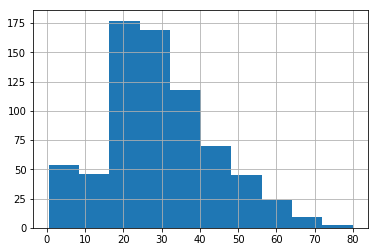

In [25]:
# Histogram of Age
dataset_v2['Age'].dropna(inplace=False).hist()

Text(0,0.5,'Age')

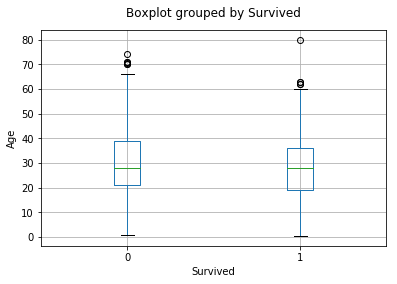

In [26]:
# Boxplot of Age by Survived
dataset_v2.boxplot(column='Age', by='Survived')
plt.title('')
plt.ylabel('Age')

Text(0,0.5,'Age')

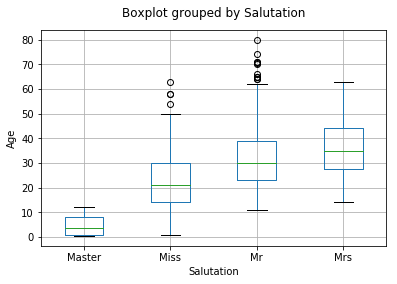

In [27]:
# Define Function to Extract Salutation from 'Name' column
# 'Name' strings are in FamilyName, Salutation. FirstName.... format
def salutation_extract(input_str):
    '''Parses name string and return salutation'''
    # Remove spaces in name string
    input_str.replace(' ', '')
    # Split input_str by comma
    substr_1_list = input_str.split(',')
    # Split substr_1 by period
    substr_2_list = substr_1_list[1].split('.')
    return substr_2_list[0].strip()

# Define wrapper function to create list of salutations for each passenger
def salutation_list_create(name_list):
    '''Takes in list/arrays/series of names and
    returns corresponding list of salutations'''
    # Initialize salutation_list
    salutation_list = []
    # For loop to extract salutations in name list
    for name in name_list:
        salutation = salutation_extract(name)
        salutation_list.append(salutation)
    return salutation_list

# Create list of salutations and add to dataset_v2
salutation_list = salutation_list_create(dataset_v2['Name'])
dataset_v2['Salutation'] = salutation_list
dataset_v2['Salutation'].value_counts()

# Filter out observations by Salutation for next box plot
# Only Mr, Mrs, Miss and Master chosen due to significant number of
# observations in these classes
mask = [i for i, salutation in enumerate(dataset_v2['Salutation'])\
        if salutation in ['Mr', 'Miss', 'Mrs', 'Master']]
dataset_v2_filtered = dataset_v2.iloc[mask, :]

# Boxplot of Age by Salutation
dataset_v2_filtered.boxplot(column='Age', by='Salutation')
plt.title('')
plt.ylabel('Age')

Since the Age variable contains missing data, there is a need to fill in these missing fields. The histogram of the variable is bell-shaped, meaning that using the mean or median to fill in all the missing fields may not be a good idea. A better way could be to generate random variable values (e.g. normal distribution), using paramters such as mean and standard deviation estimated from the data. The boxplot of the age for the 2 target classes indicate that the Age variable has approximately the same distribution for both classes, so randomly generating the Age values based on the same probability distribution could work in this case.

Based on the boxplot of age grouped by salutation, it can be seen that for most of the male passengers, the salutation 'Master' is generally given to passengers 10 years old and below, while 'Mr' is generally for those above 10 years old. For most of the female passengers, those with the salutation 'Miss' are generally younger (median of around 20), with the youngest one starting near 0, while those with 'Mrs' are generally older (median of around 35).

Dealing with missing 'Age' values:
- For passengers with salutation 'Master': Since the corresponding boxplot has relatively short length (between 0 and 10), the missing values of Age under this class could be generated from a uniform distribution between 0 and 10
- For passengers with salutations 'Miss', 'Mr' and 'Mrs': Since the corresponding boxplots have relatively longer lengths, the missing values of Age under these classes could be generated from a normal distribution, with the means and standard deviations of each class estimated from the data
- For passengers with other salutations ('Dr', 'Sir' etc): Missing values of Age could be filled in with the mean age of all passengers, as the passengers of these classes form the minority in this dataset.

### SibSp

This is one of the predictors for this problems. It is numerical, thus no encoding is needed for this variable. Since SibSp has considerable correlation with Parch, these two variables could be added to give the number of relatives of each passenger.

### Parch

This is one of the predictors for this problems. It is numerical, thus no encoding is needed for this variable. Since Parch has considerable correlation with SibSp, these two variables could be added to give the number of relatives of each passenger.

### Num_Relative

This is a predictor created by adding SibSp and Parch of every passenger. It is numerical, thus no encoding is needed for this variable.

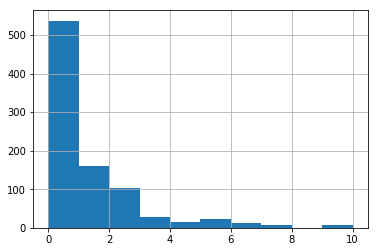

In [28]:
# Create Variable Num_Relative
dataset_v2['Num_Relative'] = dataset_v2['SibSp'] + dataset_v2['Parch']

# Histogram of Num_Relative
dataset_v2['Num_Relative'].hist()

Text(0,0.5,'Num_Relative')

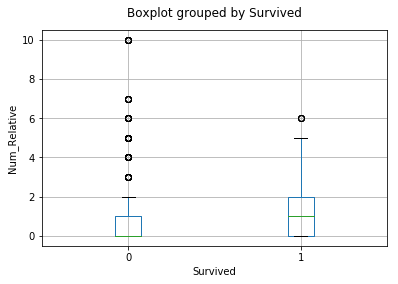

In [29]:
# Boxplot of Num_Relative by Survived
dataset_v2.boxplot(column='Num_Relative', by='Survived')
plt.title('')
plt.ylabel('Num_Relative')

From the histogram, it can be seen that the majority of passengers travelled without their immediate relatives. However, it cannot be guaranteed that these passengers were travelling alone, as they could have been on board with their friends, which do not count in Num_Relative. The boxplots indicate that Num_Relative may have some effect on the survival of the passengers as these two plots corresponding to each target class are at slightly differently levels.

### Ticket

This is a predictor for this problem. It is categorical, with many different values. The same ticket number may be seen for different passengers, indicating that some passengers may be sharing tickets. Some manipulation can be done to obtain the counts of passenger holding each ticket number.

### Ticket_Count

This is a predictor created by counting the number of passengers tagged to each ticket number. It gives an indication if the passenger was alone or had company (family, friends etc).

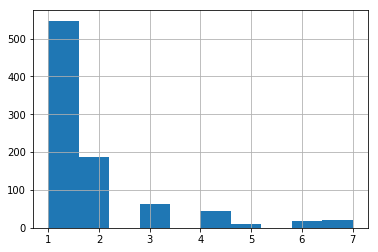

In [54]:
# Create Variable Ticket_Count
# Dataframe of ticket numbers with counts
ticket_num_counts = pd.DataFrame(dataset_v2['Ticket'].drop_duplicates())

# Obtain counts of every unique ticket number and add to ticket_num_counts
# dataframe
ticket_count_list = []
for ticket_num in ticket_num_counts['Ticket']:
    ticket_count = len([j for j, ticket in enumerate(dataset_v2['Ticket'])\
                        if ticket == ticket_num])
    ticket_count_list.append(ticket_count)
ticket_num_counts['Count'] = ticket_count_list

# Include Ticket_Count in dataset_v2 dataframe
ticket_count_long_list = []
for ticket_num in dataset_v2['Ticket']:
    ticket_count = int(ticket_num_counts[ticket_num_counts['Ticket']\
                                         == ticket_num]['Count'])
    ticket_count_long_list.append(ticket_count)
dataset_v2['Ticket_Count'] = ticket_count_long_list

# Histogram of Ticket_Count
dataset_v2['Ticket_Count'].hist()

Text(0,0.5,'Ticket_Count')

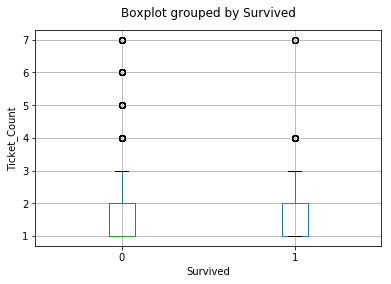

In [55]:
# Boxplot of Ticket_Count by Survived
dataset_v2.boxplot(column='Ticket_Count', by='Survived')
plt.title('')
plt.ylabel('Ticket_Count')

From the histogram, it can be observed that many of the passengers either travelled alone or as a pair, while there were not many who travelled in a bigger group. The boxplots indicate that Ticket_Count may not be a strong predictor to the survival of the passengers as these two plots corresponding to each target class are at around the same level.

### Fare

This is a predictor for this problem. It is numerical, so no encoding is needed for this variable.

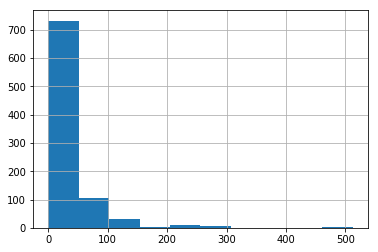

In [56]:
# Histogram of Fare
dataset_v2['Fare'].hist()

Text(0,0.5,'Fare')

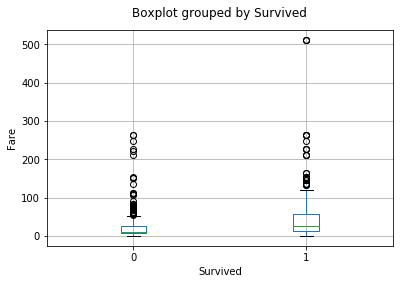

In [58]:
# Boxplot of Fare by Survived
dataset_v2.boxplot(column='Fare',by='Survived')
plt.title('')
plt.ylabel('Fare')

The histogram indicates that the majority of passengers paid fares of 100 and below, which relates to the earlier finding that the majority of passengers held 3rd class tickets. The boxplots indicate that the fare may not be a strong predictor of the passengers' survival.

### Cabin

The amount of missing information in the 'Cabin' column is around 75% (687 NaNs out of 891 observations), so it will be dropped for this problem.

### Embarked

This is one of the predictors for this problems, indicating the port of embarkation. It is categorical, and takes on the values of 'C', 'Q' and 'S'.

C - Cherbourg, Q - Queenstown, S - Southampton

In [59]:
# Show percentages of Embarked
print('Percentages:')
print(dataset_v2['Embarked'].value_counts(normalize=True)*100)

Percentages:
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


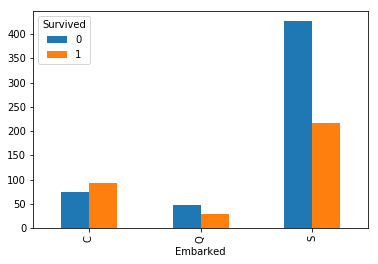

In [66]:
# Crosstab plot of Embarked
embarked_crosstab = pd.crosstab(index=dataset_v2['Embarked'],
                                columns=dataset_v2['Survived'])
embarked_crosstab.plot(kind='bar',
                       stacked=False)

It can be observed from the percentage counts that the majority of the passengers embarked from Southampton. From the crosstab, it can be deduced that the passengers from 'S' had the lowest chance of survival, followed by those from 'Q', and those from 'C' had the highest chance of survival. Since there are only 2 missing fields in this column, a simple impute based on the mode of the classes could be sufficient to fill in the empty fields.

## Overall Summary 

From your own exploration of the data, provide a few paragraphs in summary of the dataset. At this point, it may be helpful to provide a narrative which can reconstruct the situation aboard the titanic as it was sinking. This is also an opportunity to direct your attention towards areas where you feel information is raw and can be improved in your next section, through feature engineering.

Overall, it appears that some variables are more significant than others. However, we would imagine that females, especially those who embarked at 'C' and are affluent, hence being able to pay for expensive tickets, and had a higher chance of surviving. The age may not have been a strong factor in determining the chance of survival. The number of companions each passenger had does not necessarily translate to survival chance, but those who travelled with their family might have had a higher chance of survival.

The information about cabin room allocation could have been a possible predictor for the survival chance of the passengers, due to the physical location and constraints involved in the evacaution process. However, since the amount of missing data is large for this predictor, there is no guarantee that filling the missing fields either by generated values or impute by mode would give the data for Cabin that is reasonably close to the actual data.

The variables Age and Embarked contain lesser amounts of missing data, so it is possible to fill in missing values either by generating values from random variable distributions or by simple mean or mode computations.

The variables SibSp and Parch are both moderately correlated and closely related, so they can be added together, resulting in a new variable that gives an indication of the family sizes aboard the ship. By itself, the variable Ticket does not make much sense, but computing the counts of passengers having the same ticket number could give an indication of the number of companions each passenger had.

# 3. Model Interpretation and Feature Engineering

In this section, we will begin by learning to appreciate the model interpretation methods related to decision trees and random forests. Please do some of your own research about these approaches. Then, we will move on to do some feature engineering - hopefully this will give us some information gain with respect to the dataset.

## Model Interpretation

### Feature importance
Plot a graph/table of feature importance of variables. Is there anything to be expected out of the data? Is there anything unexpected? Compare these findings with your teammate - are there any major differences in these plots?

### Partial Dependence 

Another useful interpretation plot is partial dependence. `sklearn` might not have a workable library out of the box, so one option would be to try `pdpbox`.

## Feature Engineering 

In this section, you should first briefly explain your thought process - what is good, what is lacking, and what are the potential areas of information the model has yet to exploit. Following which, do some feature engineering. After every engineered feature, re-run your model and observe if there is an improvement in scores.

Running your feature importance again at different points in time can help to validate if your variables are truly important, or are they simply collinear.

# 4. Model Re-Training and Fine-Tuning

## Model Re-Training

When you are confident of your variables, re-run your model with all your variables again, and observe your feature importance. At times having extra variables may even deprove scores. You may also wish to remove features that show insignificant partial dependence. 

How much accuracy did these engineered features give? How important were these features? At this point in time, you may wish to talk to your peers and identify features they came up with (original ones, not those taken from the internet). This is a stage where brainstorming and contextual knowledge is extremely helpful.

## Model Tuning - Good for presentation

Finally, we should do some model tuning. We previously ran a "default" model, with no customization inside our RandomForestClassifier model. However, if we were to look at the parameters, we'll see that there are many you can change.

In [53]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Evidently, there are many variables worth checking out. For now, some of the most salient ones are `max_depth`, `max_leaf_nodes`, `max_features` and `n_estimators`. These are in general, all parameters we tweak to decrease overfitting. Try tuning these parameters, plotting a graph of model accuracy against parameter variation for each variable.

Other useful parameters are `oob_score`, which serves as a validation set of unsampled data points during the bootstrap, and `n_jobs`, which parallelises the process. We recommend you set `oob_score` to `True` (and use the oob_score as a metric), and `n_jobs` to `-1` to speed up your training process.
<br /><br />
<font color=red>This is not a prerequisite per se, but at this point, you should try to understand the bootstrapping concept. After all, this single concept gave rise to random forests and many other statistical methods we know today!</font>

### Subsampling 

The `fastai` library has a very cool method called `set_rf_samples`, which sets the number of subsamples we use in each tree we initalize. For more information, you may refer [here on stackoverflow](https://stackoverflow.com/questions/44955555/how-can-i-set-sub-sample-size-in-random-forest-classifier-in-scikit-learn-espec). You might wish to play with this variable, as it can give you some improved performance.

### Cross Validation (Optional)

If we think about what we do with validation, we're actually taking a portion (20%) of our data out of our training set for validation purposes. This means that we are sacrificing training data (and hence predictive power) to create a less overfitted, more generalised model. There is a trade-off for our model: we remove overfitting (variance) by sacrificing predictive power (increasing bias). This is known as the bias variance trade-off, which we will go into more detail next week.

We will go into details next week, but in short, this can be avoided using cross validation. If you have done this before, you may use cross validation to improve the model here. Report your accuracy.

Otherwise, if we know all the validation scores for all our models, simply pick the best model in terms of validation score. Report your accuracy. 

Put back all our data into one big training set, and re-train the model using this training set. You can now make a prediction on your test set, and submit your result to Kaggle!

### Submission

What is your Kaggle leaderboard performance? Please provide your Kaggle username as well. We hope you have had a prediction accuracy of at least 78%, but it's okay if you don't.

In [ ]:
predictions[['PassengerId', 'Survived']].to_csv('data/submission.csv', index=False)

In [ ]:
# Accuracy:
# Kaggle name:

## Future Improvements

Not all models are perfect, especially not in the constraint of time. Do some research on the models that do better than you, and list out the areas that you can improve on in the long run. Prioritise these improvements and spell out how you can implement them if they are non-trivial to implement.

- Ensembling/stacking instead of using a single RF model
- 

# 5. Building your Random Forest from Scratch

Congratulations! You have completed the tutorial on random forests... not!

Apart from modelling, each week, you will also be expected to implement the models we are using. After all, the best way to learn is to implement from scratch. AI Apprentices are not only expected to model, but also do the necessary engineering for real life problems, and many such problems require custom code. For example, we may want to use subsampling to improve our model performance, but edge-cutting methods would not yet be available in common libraries. When this happens, you will have to address these problems yourself.

Numerical programming might be new to some, if you did not come from the R/Matlab side of things. To get yourself up to speed with numerical programming in Python, we highly recommend Wes McKinney's [Python for Data Analysis, 2nd Ed.](https://www.safaribooksonline.com/library/view/python-for-data/9781491957653/)

__Note__: In this guided implementation, we made 2 decisions, firstly to use a Python `class`, i.e. object oriented programming (arguably so at least), and secondly to use the `numpy` library. Neither of these decisions are compulsory - if you have prior experience in another style, or using alternative libraries, feel free to do so, and modify the script to allow your code to run. However, if you have no prior experience, we suggest sticking to this format - we will follow `scikit-learn`'s format, which we believe is increasingly an industry standard.

## Decision Trees 

A random forest, as the the name suggests, is made up of many decision trees, each with levels of variation and randomness. Before looking at random forests, we will look at understanding what decision trees do.

Decision trees, more specifically Classification and Regression Trees (CARTs), are an algorithm/data structure that learns to split data out based on rules it learns. There are many resources out there to get a good understanding of what CARTs are, which you may wish to reference while accomplishing the tasks here.

### Gini Criterion

If you remember from `get_params`, there exists a parameter `criterion: 'gini'`. This means that the tree is using Gini as a criterion to decide how to separate the data.

Hence, we will first learn how to use the Gini impurity score. The Gini impurity score of a node n is given as:  

<center>$i(n) = 1 - p^2_0 - p^2_1$,  </center>  

Where $p_1$ refers to the proportion of 1's in that node, and $p_0$ refers to the proportion of 0's.

In [ ]:
from src.decision_tree import DecisionTree

For the above line of code to work, you will have to do the following if you haven't done so:
1. Create a folder called src at the directory of your current notebook
2. Create a __init__.py empty file in the src folder -see http://mikegrouchy.com/blog/2012/05/be-pythonic-__init__py.html
3. Create a file, `decision_tree.py`. You can consider the terminal script `touch decision_tree.py`
4. create a class `DecisionTree` inside `deicison_tree.py`

You may realise that for this part of the coursework, we are not writing code directly into Jupyter notebooks, but inside the /src/ folder as `.py` files. We are maintaining a code base, outside of the Jupyter notebook. We do this for two reasons - 1) because this code is highly reusable in future sessions, beyond the scope of one notebook. 2) because such code bases are collaboration-friendly, as Git and Jupyter notebooks do not play well with each other, but python files do. In the future, non-exploratory code will be written in teams, so scripts would be a more collaboration friendly format. The `src/` folder structure is a very basic and light introduction to this, but in short, each project should have a different folder structure to cater to its needs.

In [ ]:
def approx_eq(a, b, num_sig=5):
    return round(a, num_sig) == round(b, num_sig)

In [ ]:
approx_eq(DecisionTree().gini([1, 0, 0, 0, 0], [1, 1, 1, 1, 0]), .32)
# for the above line of code to work,
# 1. create a method gini that takes in 2 arrays and computes the node's gini impurity
# 2. implement the method as per the mathematical formula given
# 3. if you would like to turn this into a private method, make the necessary adjustments
# -> DecisionTree()._DecisionTree__gini()

### fit(X_train, y_train)

Following sklearn's `fit` and `predict`/`score` approach to programming, we will be implementing the fit and predict methods. First, we will attempt to implement a fit method.

The fit method will take in 2 numpy matrices: a m\*n train array with m training examples of n features, and a m\*1 array of labels.

There are tons of resources available to describe the workings of a CART. We would encourage you to find a source that best suits your needs, but we have picked out two points which other resources may miss at the implementation stage. Feel free to find more resources to expand on these areas:

1. The CART is a recursive tree structure. Every node of the tree can be seen as a decision tree node. When it splits, its left and right branches and its child nodes. When fitting a tree, you should recursively fit the nodes of the tree, in a way that the fitting can be used to predict in the future.

2. In finding the best condition to split the variables, it is alright to iterate through every single unique value of every variable, and determine the best condition through the iterations. The best condition can be defined as the one that provides the most __information gain__, which is defined as the greatest loss in Gini impurity.

If this is your first time doing object oriented programming in Python, we would high recommend you expose yourself to some Python resources first, or read the Python documentation. __If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
# read a new csv and remove complicated columns
titanic = pd.read_csv('data/titanic.csv')
X_cols = titanic.columns
X_cols = X_cols.drop('Age')
X_cols = X_cols.drop('Cabin')
X_cols = X_cols.drop('Name')
X_cols = X_cols.drop('Ticket')
titanic = titanic[X_cols]

# one hot encoding for remainining multiclass columns
titanic['Sex_m'] = (titanic['Sex'] == 'male').astype('int')
titanic['Embarked_S'] = (titanic['Embarked'] == 'S').astype('int')
titanic['Embarked_C'] = (titanic['Embarked'] == 'C').astype('int')
titanic = titanic.drop(['Sex', 'Embarked'], axis=1)

# create X and y, test and train
X_cols = titanic.columns
X_cols = X_cols.drop('Survived')
X_titanic = titanic[X_cols]
y_titanic = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, random_state=99)

In [ ]:
dt = DecisionTree()

In [ ]:
dt.fit(X_train.values, y_train.values)

### predict(X_test)

If you have designed your `fit` method well, predict method will be naturally easy. If the node is a leaf, simply return the leaf value. If the node is not a leaf, call predict on one of its child nodes depending on whether it fits the condition.

__If you need more help with these methods, ask a peer with programming experience, or you can seek help from the team.__

In [ ]:
preds_dt = dt.predict(X_test.values)
sum(preds_dt == y_test)/len(y_test)

## Random Forests

Now that we have a decision tree, we can build a random forest, comprising of decision trees of randomised bootstraps of our dataset. At the simplest level, a random forest can be simply a list of decision trees that take a vote on the outcome of the prediction. This list can be an attribute of the random forest.

The basic modification of random forests is the use of bootstrapping. Bootstrapping is done in a few lines of code through `np.random.choice`.

Hence, to begin, build a simple random forest, that will initialise 5 trees through bootstrapping (sampling 100% with replacement), and predict the answer through a voting mechanism out of all the 5 trees. For computational efficiency, we recommend using `np.stack` and `np.array.mean`.

In [ ]:
rf_0 = RandomForest()
rf_0.fit(X_train.values, y_train.values)
preds_rf = rf_0.predict(X_test.values)
sum(preds_rf == y_test)/len(y_test)

Next, we will implement `n_trees` to be tweakable. In addition, we will have a `subsample_size` parameter, which does the subsampling that the sklearn's random forest could not do. We can continue to use `np.random.choice`, but if subsample_size > 1, we can sample without replacement instead. (Or you could have another parameter to adjust that too.)

In [ ]:
rf_1 = RandomForest(n_trees=10, subsample_size=0.8)
rf_1.fit(X_train.values, y_train.values)
preds_rf1 = rf_1.predict(X_test.values)
sum(preds_rf1 == y_test)/len(y_test)

Finally, we will implement the `feature_proportion` feature, which refers to the number of features we allow each tree to use. This further increases the randomness and eliminates overfitting.

In [ ]:
rf_2 = RandomForest(n_trees=100, subsample_size=0.5, feature_proportion=0.5)
rf_2.fit(X_train.values, y_train.values)
preds_rf2 = rf_2.predict(X_test.values)
sum(preds_rf2 == y_test)/len(y_test)

You may wish to attempt to implement other optional parameters of random forest. One important parameter is `max_features` which makes the tree lose some features at every node, or `max_depth`, which limits the number of levels the tree can have. However, we chose to leave these out, as they require tweaking at the decision tree level, which is an exercise left for your own choice.

__Congratulations!__ You have finally come to the end of the week 1. Hope you had as much fun as we had building it!

<img src="https://www.ambitiouskitchen.com/wp-content/uploads/2014/03/glutenfreecookies-6.jpg" />